In [2]:
import networkx as nx
from GraphGenusGenerator import GraphGenusGenerator

In [14]:
problem = GraphGenusGenerator().generate(seed=133878, number_of_nodes=8, max_connections_per_node=3, complete_graph=False)

AttributeError: 'dict' object has no attribute 'is_directed'

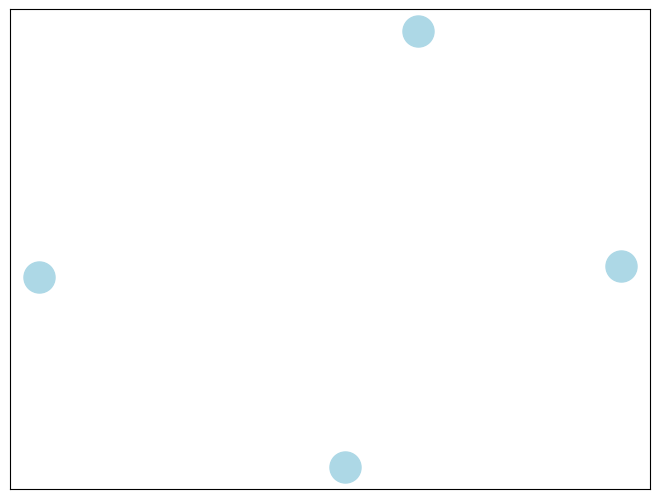

In [3]:
# Get the adjacency list (which is a graph object)
graph = problem.adj_list

# Draw the generated graph
import matplotlib.pyplot as plt
nx.draw(graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
plt.title("Input Graph for Graph Genus Problem")
plt.show()

In [15]:
for i in problem.adj_list:
    print(i, problem.adj_list[i])


0 [3, 5, 1]
3 [0, 2, 1, 4, 5, 6]
5 [0, 3, 6]
1 [0, 2, 3]
2 [1, 3, 6, 7]
6 [2, 5, 3]
4 [3]
7 [2]


In [16]:
for i in problem.find_neighbors():
    print(i)

{0: [5, 3, 1], 3: [0, 2, 1, 4, 5, 6], 5: [0, 3, 6], 1: [0, 2, 3], 2: [1, 3, 6, 7], 6: [2, 5, 3], 4: [3], 7: [2]}
{0: [1, 5, 3], 3: [0, 2, 1, 4, 5, 6], 5: [0, 3, 6], 1: [0, 2, 3], 2: [1, 3, 6, 7], 6: [2, 5, 3], 4: [3], 7: [2]}
{0: [3, 1, 5], 3: [0, 2, 1, 4, 5, 6], 5: [0, 3, 6], 1: [0, 2, 3], 2: [1, 3, 6, 7], 6: [2, 5, 3], 4: [3], 7: [2]}
{0: [3, 5, 1], 3: [0, 2, 1, 4, 5, 6], 5: [0, 3, 6], 1: [2, 0, 3], 2: [1, 3, 6, 7], 6: [2, 5, 3], 4: [3], 7: [2]}
{0: [3, 5, 1], 3: [0, 2, 1, 4, 5, 6], 5: [0, 3, 6], 1: [3, 2, 0], 2: [1, 3, 6, 7], 6: [2, 5, 3], 4: [3], 7: [2]}
{0: [3, 5, 1], 3: [0, 2, 1, 4, 5, 6], 5: [0, 3, 6], 1: [0, 3, 2], 2: [1, 3, 6, 7], 6: [2, 5, 3], 4: [3], 7: [2]}
{0: [3, 5, 1], 3: [0, 2, 1, 4, 5, 6], 5: [0, 3, 6], 1: [0, 2, 3], 2: [3, 1, 6, 7], 6: [2, 5, 3], 4: [3], 7: [2]}
{0: [3, 5, 1], 3: [0, 2, 1, 4, 5, 6], 5: [0, 3, 6], 1: [0, 2, 3], 2: [6, 3, 1, 7], 6: [2, 5, 3], 4: [3], 7: [2]}
{0: [3, 5, 1], 3: [0, 2, 1, 4, 5, 6], 5: [0, 3, 6], 1: [0, 2, 3], 2: [7, 3, 6, 1], 6: [2, 5, 3],

In [17]:
def hill_climb(problem=None, max_iter=None):
    iter = 0
    state = problem.adj_list
    fitness_fn = problem.fitness_fn.evaluate
    find_neighbors = problem.find_neighbors
    while iter < max_iter:
        neighbors = find_neighbors()
        fitness_list = [fitness_fn(neighbor) for neighbor in neighbors]
        print("iteration", iter, "neighbors")
        for neighbor in neighbors:
            print(neighbor)
        print("iteration", iter, "fitness_list", fitness_list)
        best_neighbor_fitness = min(fitness_list)
        print("iteration", iter, "best_neighbor_fitness", best_neighbor_fitness)
        best_fit_index = fitness_list.index(best_neighbor_fitness)
        state = neighbors[best_fit_index]
        iter += 1
    return fitness_fn(state), state

print(hill_climb(problem=problem, max_iter=100))


iteration 0 neighbors
{0: [5, 3, 1], 3: [0, 2, 1, 4, 5, 6], 5: [0, 3, 6], 1: [0, 2, 3], 2: [1, 3, 6, 7], 6: [2, 5, 3], 4: [3], 7: [2]}
{0: [1, 5, 3], 3: [0, 2, 1, 4, 5, 6], 5: [0, 3, 6], 1: [0, 2, 3], 2: [1, 3, 6, 7], 6: [2, 5, 3], 4: [3], 7: [2]}
{0: [3, 1, 5], 3: [0, 2, 1, 4, 5, 6], 5: [0, 3, 6], 1: [0, 2, 3], 2: [1, 3, 6, 7], 6: [2, 5, 3], 4: [3], 7: [2]}
{0: [3, 5, 1], 3: [0, 2, 1, 4, 5, 6], 5: [0, 3, 6], 1: [2, 0, 3], 2: [1, 3, 6, 7], 6: [2, 5, 3], 4: [3], 7: [2]}
{0: [3, 5, 1], 3: [0, 2, 1, 4, 5, 6], 5: [0, 3, 6], 1: [3, 2, 0], 2: [1, 3, 6, 7], 6: [2, 5, 3], 4: [3], 7: [2]}
{0: [3, 5, 1], 3: [0, 2, 1, 4, 5, 6], 5: [0, 3, 6], 1: [0, 3, 2], 2: [1, 3, 6, 7], 6: [2, 5, 3], 4: [3], 7: [2]}
{0: [3, 5, 1], 3: [0, 2, 1, 4, 5, 6], 5: [0, 3, 6], 1: [0, 2, 3], 2: [3, 1, 6, 7], 6: [2, 5, 3], 4: [3], 7: [2]}
{0: [3, 5, 1], 3: [0, 2, 1, 4, 5, 6], 5: [0, 3, 6], 1: [0, 2, 3], 2: [6, 3, 1, 7], 6: [2, 5, 3], 4: [3], 7: [2]}
{0: [3, 5, 1], 3: [0, 2, 1, 4, 5, 6], 5: [0, 3, 6], 1: [0, 2, 3], 2: [7, 3

In [9]:
print(hill_climb(problem=problem, max_iter=100))


0 1 0 {0: [2, 1, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}
1 1 0 {0: [2, 1, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}
2 1 0 {0: [2, 1, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}
3 1 0 {0: [2, 1, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}
4 1 0 {0: [2, 1, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}
5 1 0 {0: [2, 1, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}
6 1 0 {0: [2, 1, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}
7 1 0 {0: [2, 1, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}
8 1 0 {0: [2, 1, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}
9 1 0 {0: [2, 1, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}
10 1 0 {0: [2, 1, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}
11 1 0 {0: [2, 1, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}
12 1 0 {0: [2, 1, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}
13 1 0 {0: [2, 1, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}
14 1 0 {0: [2, 1, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}
15 1 0 {0: [2, 1, 3], 1: [0, 2, 3], 2: [0, 1, 3], 